# TEST RESULT

In [2]:
from pathlib import Path
import json
import pandas as pd
import re
import numpy as np

BASE = Path('/workspace/detect-me/product_classifier/saved_models/by_category/')

!ls $BASE

densenet121  efficientnetb7	  resnet152v2  resnet50v2	 test_result
densenet201  inception_resnet_v2  resnet50     tensorboard_logs  vgg16


In [3]:
list_modesl = ['densenet121',
'efficientnetb7',
'resnet152v2',
'resnet50v2',
'densenet201',
'inception_resnet_v2',
'resnet50',
'vgg16',
]

list((BASE / list_modesl[0]).glob('*'))

test_results = (BASE / 'test_result').glob('*.json')
data_dict = dict() 
for filep in test_results:
    with open(filep) as file:
        data = json.load(file)
    data_dict[filep.stem] = data

dataframe_testResult = pd.DataFrame(data_dict).T.reset_index()
dataframe_testResult = \
        dataframe_testResult.rename({'index' : 'tag'},
                            axis=1)

dataframe_testResult['top_3_acc'].\
    fillna(dataframe_testResult['top_3_accuracy'],
          inplace=True)

dataframe_testResult = dataframe_testResult.drop('top_3_accuracy', axis=1)

# (?<=Freeze)\d+(?=:?<)

In [7]:
dataframe_testResult.head()

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9
0,inception_resnet_v2_INCEPTION_RES---(Freeze-20...,0.201931,0.944643,0.983333,0.957991,0.990537,0.936607,0.872321
1,resnet152v2_RESNET152V2---(Freeze-500)-(lr-0.0...,0.236713,0.943155,0.983631,0.953799,0.984011,0.933929,0.879167
2,densenet121_DenseNet121---(Freeze-50)-(lr-0.00...,0.322026,0.912798,0.974405,0.935564,0.984471,0.898810,0.811310
3,densenet201_DenseNet201---(Freeze-200)-(lr-0.0...,0.209737,0.941667,0.985119,0.954117,0.988128,0.934524,0.866964
4,densenet201_DenseNet201---(Freeze-200)-(lr-0.0...,0.228099,0.938095,0.983333,0.949394,0.983645,0.932440,0.877083


In [28]:
patterns = [('freeze', '(?<=Freeze-)\d+'),
           ('lr' , '(?<=lr-)[\d|.]+'),
           ('dropout' , '(?<=dropout-)[\d|.]+'),
           ('epochs_it_ran' , '(?<=epochs_it_ran-)\d+'),
           ('tag_HMS' , '(?<=----)\d+'),
           ]

In [42]:
# re.findall(patterns[1][1], 'snet152v2_RESNET152V2----(lr-0.002(Freeze-500)-(l16)-(dropout-0.4)')[]

In [40]:
for (n , p) in patterns:
    dataframe_testResult.loc[:,n] =\
        dataframe_testResult['tag'].\
                apply(lambda x : re.search(p,x).group() if re.search(p,x) else np.nan)

In [ ]:
dataframe_testResult = dataframe_testResult.assign(modelname = dataframe_testResult.tag.apply(lambda x: x.split('_')[0]))

In [46]:
dataframe_testResult['tag_HMS'].duplicated().sum()

0

In [51]:
dataframe_testResult.head(1)

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname
0,inception_resnet_v2_INCEPTION_RES---(Freeze-20...,0.201931,0.944643,0.983333,0.957991,0.990537,0.936607,0.872321,20,0.002,0.4,13,195036,inception


In [65]:
import seaborn as sns
sns.set_theme(style="whitegrid")


def plot_rel(col):
    # cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
    g = sns.relplot(
        data=dataframe_testResult,
        x="modelname", y=col,
        hue="modelname", size="dropout",
        height=6, aspect=1.5, alpha=0.8,
        sizes=(10, 500),
    )
    # g.set(xscale="log", yscale="log")
    g.ax.xaxis.grid(True, "minor", linewidth=.25)
    g.ax.yaxis.grid(True, "minor", linewidth=.25)
    g.despine(left=True, bottom=True)

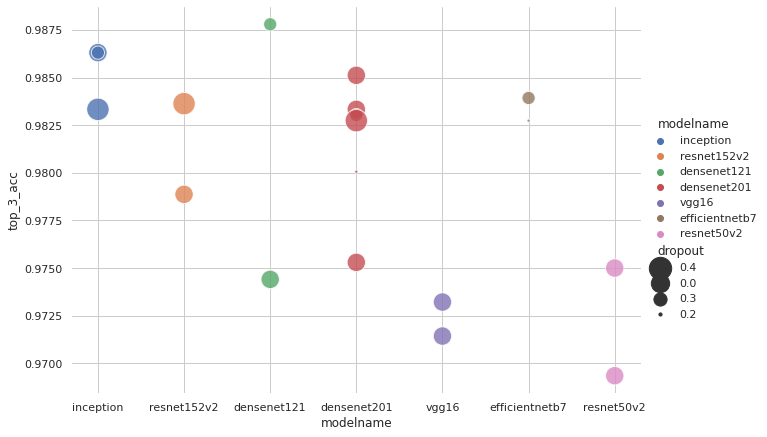

In [66]:
plot_rel('top_3_acc')

In [76]:
dataframe_testResult.sort_values('loss').head(5)

,tag,loss,accuracy,top_3_acc,PRCN-tr-0.5,PRCN-tr-0.9,recall-tr--0.5,recall-tr--0.9,freeze,lr,dropout,epochs_it_ran,tag_HMS,modelname
18,densenet121_DenseNet121---(Freeze-0)-(lr-0.001...,0.170583,0.959821,0.987798,0.968072,0.991616,0.956548,0.915179,0,0.001,0.3,23,231339,densenet121
16,inception_resnet_v2_INCEPTION_RES---(Freeze-20...,0.190048,0.950893,0.986310,0.959807,0.985366,0.945238,0.901786,200,0.002,0.3,15,155554,inception
0,inception_resnet_v2_INCEPTION_RES---(Freeze-20...,0.201931,0.944643,0.983333,0.957991,0.990537,0.936607,0.872321,20,0.002,0.4,13,195036,inception
3,densenet201_DenseNet201---(Freeze-200)-(lr-0.0...,0.209737,0.941667,0.985119,0.954117,0.988128,0.934524,0.866964,200,0.0008,0.0,NaN,115930,densenet201
13,efficientnetb7_EfficientNetB7---(Freeze-400)-(...,0.210987,0.941964,0.982738,0.958690,0.989813,0.932440,0.867560,400,0.0005,0.2,NaN,031445,efficientnetb7


---

---

---

---

## DATA,  let's see 

oversample_data ['milk' 'yogurt']
!!!!!!!!!!!!!!!!!!!!!!!!!
excluding (13247, 8) from trainig
!!!!!!!!!!!!!!!!!!!!!!!!!
                                filename class
0    ../data/milk/train-val/256923/0.jpg  shyr
1    ../data/milk/train-val/256923/1.jpg  shyr
2   ../data/milk/train-val/256923/10.jpg  shyr
3  ../data/milk/train-val/256923/108.jpg  shyr
4  ../data/milk/train-val/256923/109.jpg  shyr
110
len classes_set 110
Found 77698 validated image filenames belonging to 110 classes.
Found 19474 validated image filenames belonging to 110 classes.
Found 3360 validated image filenames belonging to 110 classes.


/workspace/keras-retinanet/keras-retina-venv/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


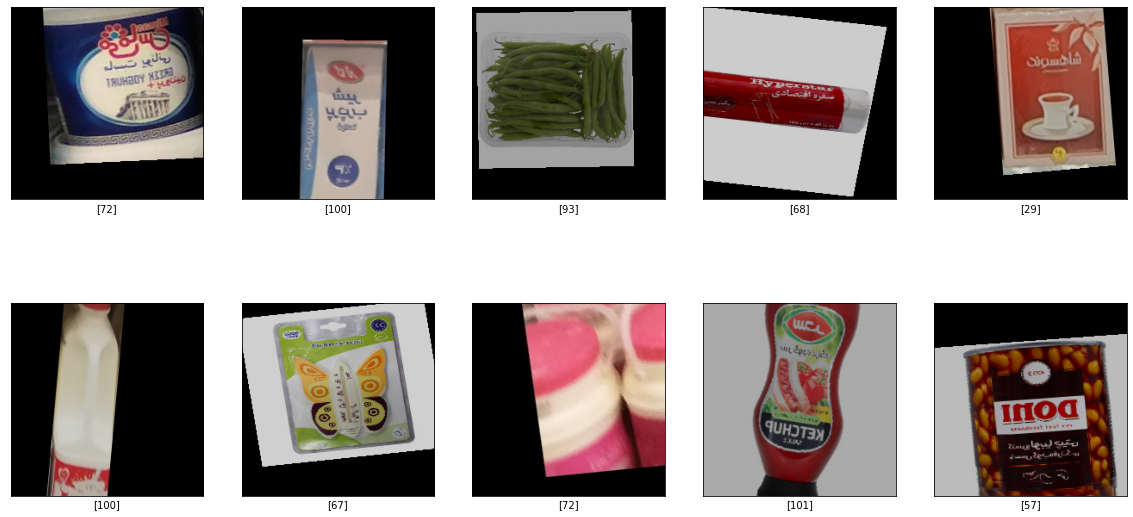

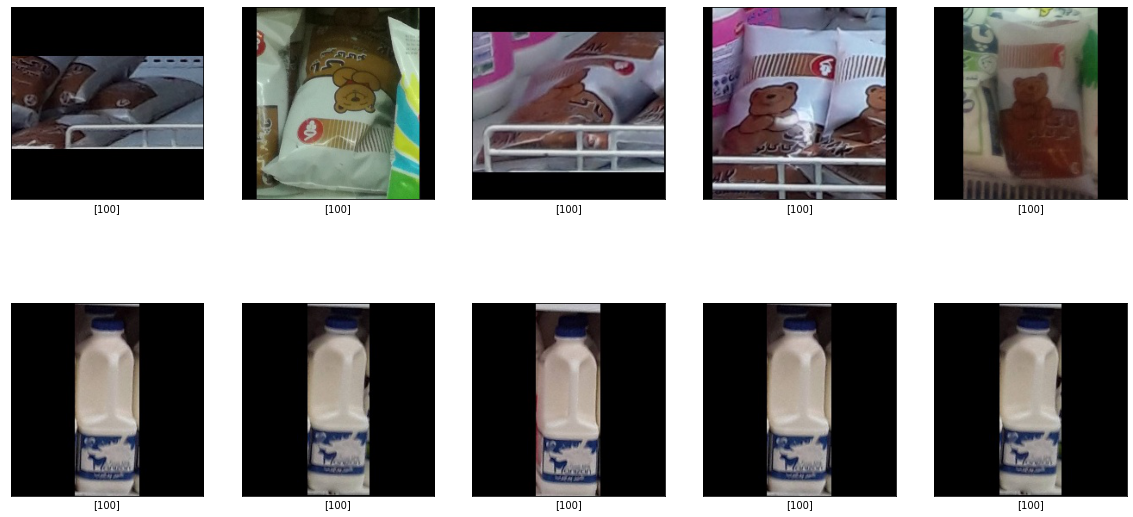

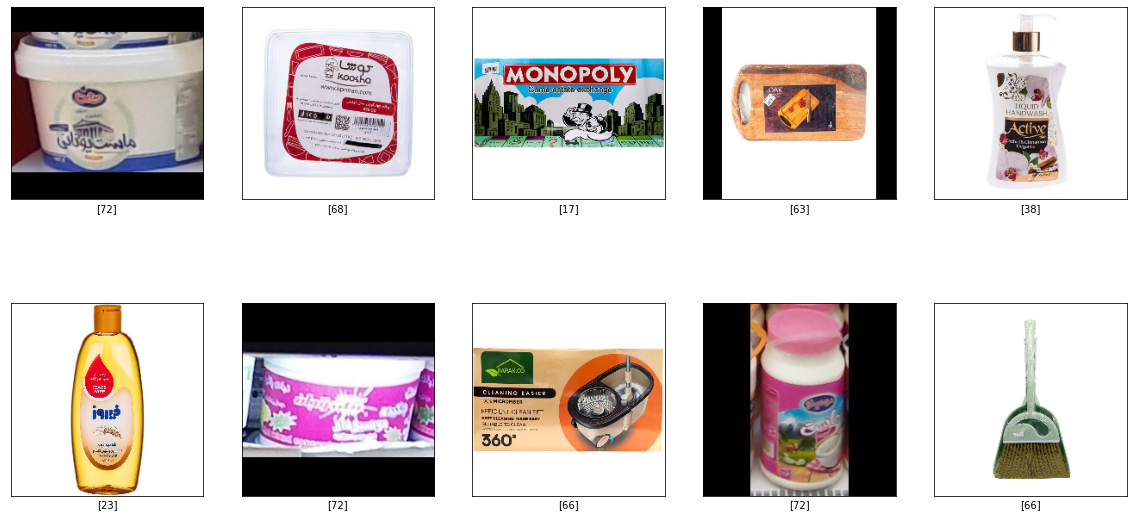

In [11]:
import sys
sys.path.append('../scripts')
from utils.data_loader import load_data_flow_from_dataframe
import numpy as np
import math
import matplotlib.pyplot as plt

data_dir = '../data'

data_flow_df = load_data_flow_from_dataframe(
                data_dir,
                (224,224),
                1)

def plot_from_flow(flow , howmany, ncols):
    rows = math.ceil(howmany/ncols)
    plt.figure(figsize=(20,rows*5))
    for i in range(howmany):
        plt.subplot(rows,ncols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        image , label = flow.__next__()
        image = image.astype(np.uint8)
        plt.imshow(image[0,...],
                  )
        plt.xlabel(np.argmax(label, axis=1))
    plt.show()
plot_from_flow(data_flow_df['train'], 10, 5)

plot_from_flow(data_flow_df['test'], 10, 5)

plot_from_flow(data_flow_df['validation'], 10, 5)

# evaluate save models 

In [1]:
from tensorflow.keras.models import load_model
import pandas as pd
from pathlib import Path
from itertools import islice

In [2]:
BASE = Path('/workspace/detect-me/product_classifier/saved_models/by_category/')

!ls $BASE

densenet121  efficientnetb7	  resnet152v2  resnet50v2	 test_result
densenet201  inception_resnet_v2  resnet50     tensorboard_logs  vgg16


In [3]:
model_path = list(Path(BASE / 'densenet121').glob('*231339'))[0]

In [4]:
def load_model_with_info(model_path):
    csv = pd.read_csv(model_path/  'label_mapping.csv')
    train_count =\
        pd.read_csv(model_path / 'train_info.csv',
                              index_col=0,
                              names = ['code', 'count'])
    train_count = train_count.reset_index().dropna().drop('index',axis=1)

    joind_train_info = train_count.set_index('code').join(csv.set_index('CODE'))
    joind_train_info.index.name = 'label-code'
    joind_train_info = joind_train_info.reset_index()

    model = load_model(model_path)
    return model ,  joind_train_info

In [9]:
model, info = load_model_with_info(model_path)

In [12]:
tests = list(islice(data_flow_df['test'], 1000))
test_n = ((x[0], x[1]) for x in tests if np.argmax(x[1]) != 100)
# model.evaluate(test_n)

In [39]:
image, label = test_n.__next__()

def post_prediction(preds, info):
    return info[info['label-code'] == np.argmax(ps)]
ps = model.predict(image)

result = post_prediction(ps,info)

In [67]:
from keras.applications import imagenet_utils

# FLASK 

In [72]:
from keras.preprocessing.image import img_to_array
import flask
from pathlib import Path
from tensorflow.keras.models import load_model
import io
from PIL import Image

app = flask.Flask(__name__)
model = None

In [73]:
model_path = list(Path(BASE / 'densenet121').glob('*231339'))[0]

In [74]:
def load_model_to_infer(model_path):
    global model
    model = load_model(model_path)

In [75]:
def get_train_info(model_path):
    csv = pd.read_csv(model_path/  'label_mapping.csv')
    train_count =\
        pd.read_csv(model_path / 'train_info.csv',
                              index_col=0,
                              names = ['code', 'count'])
    train_count = train_count.reset_index().dropna().drop('index',axis=1)

    joind_train_info = train_count.set_index('code').join(csv.set_index('CODE'))
    joind_train_info.index.name = 'label-code'
    joind_train_info = joind_train_info.reset_index()
    return joind_train_info

In [76]:
def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
#     image = imagenet_utils.preprocess_input(image)

    # return the processed image
    return image

In [77]:
def post_prediction(preds, info):
    return info[info['label-code'] == np.argmax(ps)]

In [78]:
@app.route("/predict", methods=["POST"])
def predict():
    # initialize the data dictionary that will be returned from the
    # view
    data = {"success": False}

    # ensure an image was properly uploaded to our endpoint
    if flask.request.method == "POST":
        if flask.request.files.get("image"):
            # read the image in PIL format
            image = flask.request.files["image"].read()
            image = Image.open(io.BytesIO(image))

            # preprocess the image and prepare it for classification
            image = prepare_image(image, target=(224, 224))

            # classify the input image and then initialize the list
            # of predictions to return to the client
            preds = model.predict(image)
            info = get_train_info(model_path)
            
            result = post_prediction(preds, info)
            result = result.to_dict()
            result["success"] = True

    # return the data dictionary as a JSON response
    return flask.jsonify(result)

In [ ]:
if __name__ == "__main__":
    print(("* Loading Keras model and Flask starting server..."
        "please wait until server has fully started"))
    model_path = list(Path(BASE / 'densenet121').glob('*231339'))[0]
    load_model_to_infer(model_path)
    app.run()

* Loading Keras model and Flask starting server...please wait until server has fully started
 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Aug/2021 03:37:40] "POST /predict HTTP/1.1" 200 -


---

---

---